In [8]:
import tensorflow as tf

In [9]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [15]:
X_train[0].shape

(28, 28)

### 0   ----> BLACK POINTS
### 255 ----> WHITE POINTS

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### plotting 1st training image !

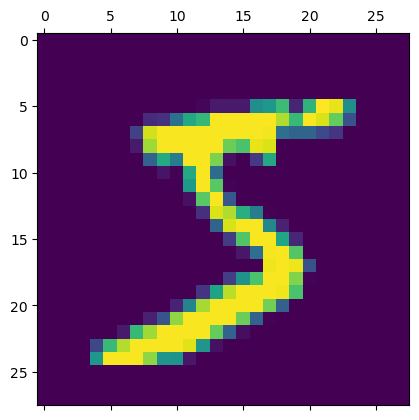

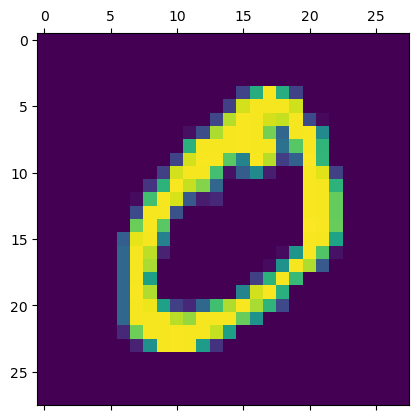

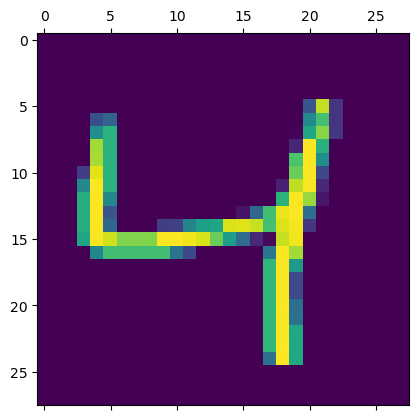

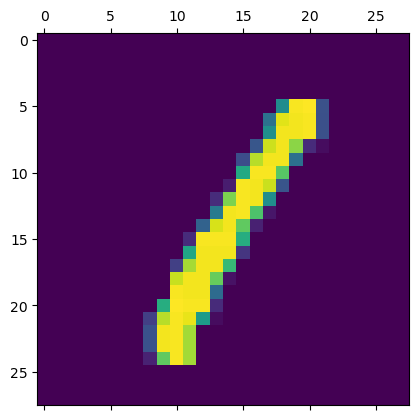

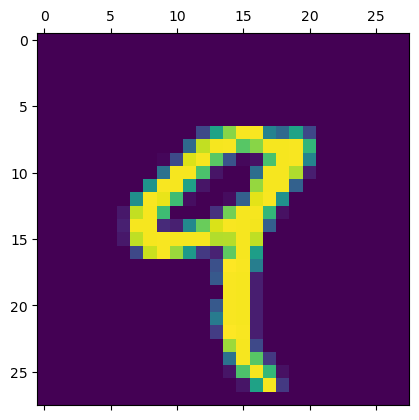

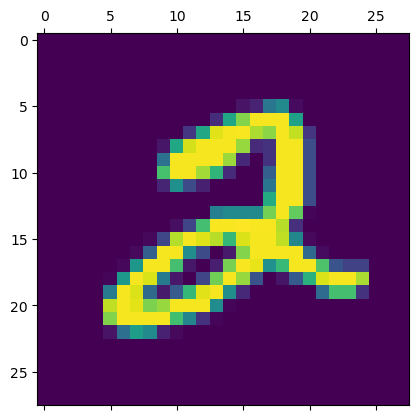

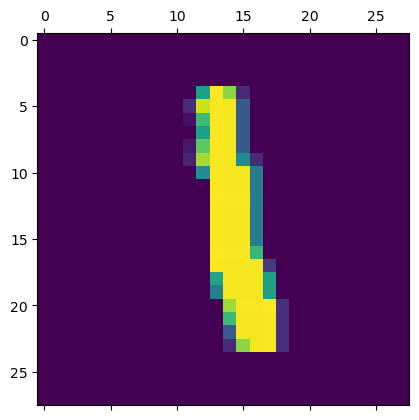

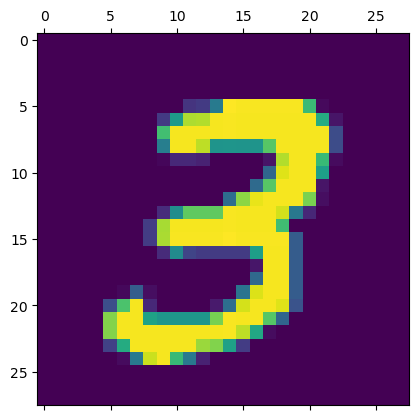

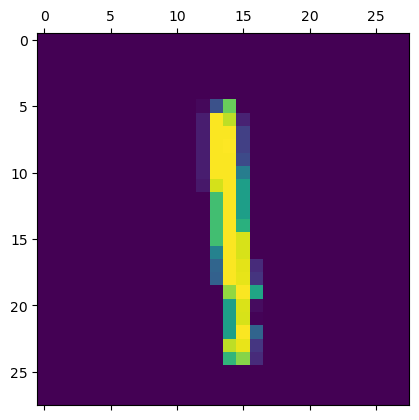

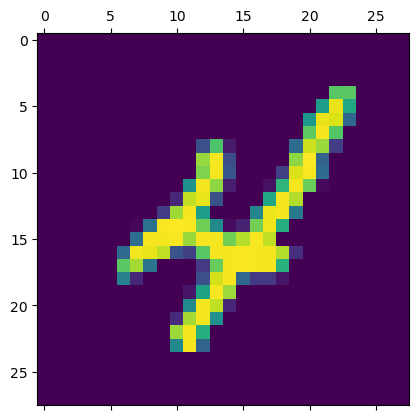

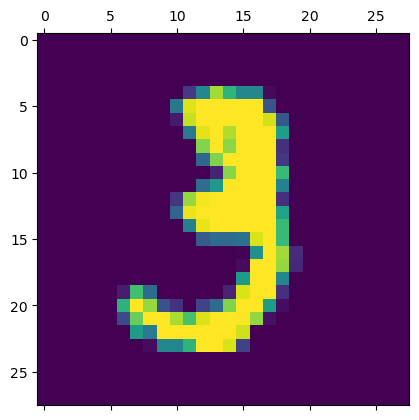

In [17]:
for i in range (0,11):
    plt.matshow(X_train[i])



In [18]:
y_train.shape
 


(60000,)

### FLATTEN THE TRAINING DATASET 

##### (converting 28 * 28 grid in a single array!, i.e 748 elements to a single array!) therefore using reshape


In [19]:
X_train.shape

(60000, 28, 28)

#### SCALING THE VALUES IN A COMMON RANGE !!! 

##### since my accuracy was coming 0.47 therefor i'm performing this step!

In [20]:
X_train = X_train / 255

X_test = X_test / 255

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
X_train_flatten = X_train.reshape(len(X_train),28*28)   #len(X_train) :- 1st param

X_train_flatten.shape

(60000, 784)

In [23]:
X_test_flatten = X_test.reshape(len(X_test),28*28)

X_test_flatten.shape

(10000, 784)

In [24]:
X_test_flatten[0] #converted from 2D array to 1D array!!!

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### CREATING A SIMPLE NEURAL NETWORK 


##### input layer :---> with 748 elements , output layer with 10 elements


In [25]:
model = keras.Sequential ([
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')  #10 :--> 10 means the 10 neurons/OUTPUT LAYER!!
])                                             #input_shape is 784 elements



#model.compile() #optmizers :--> allow us to train efficiently basically when the backward propagation and training is going on!!, optimizer will allow us to reach to global optima in efficient way  
                #loss function :--> as meri o/p class categorical h we have categories 0-9, 10 classes in our output
                                # sparse means my output variable = y_train (an integer number!!!!)
                                # agar ye 1 hot encoded hota toh mei categorical_crossentropy



model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs = 5) #epoch --> no. of iterations my Neural Netwrk is going to run the training 




c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8219 - loss: 0.7075
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9133 - loss: 0.3146
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9195 - loss: 0.2845
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.2782
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9263 - loss: 0.2631


##### IN TRAINING I GOT ACCURACY AS accuracy: 0.9259 - loss: 0.2644


#### EVALUATING ACCURACY ON TEST DATA

In [26]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9128 - loss: 0.3044


[0.2653658092021942, 0.9258999824523926]

### PREDICTING VALUES

In [27]:
y_predicted_values = model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
y_predicted_values[0]

# plt.matshow(X_test_flatten[0])

array([1.8732568e-02, 3.2379523e-07, 6.5176360e-02, 9.5407093e-01,
       2.1094086e-03, 1.0446629e-01, 2.9694386e-06, 9.9984533e-01,
       9.8280191e-02, 6.7348677e-01], dtype=float32)

In [29]:
np.argmax(y_predicted_values[0]) #find max value and print it's index!!!

7

#### COMPARING RESULTS WITH ORIGINAL VALUES i.e y_test vs y_predicted_values!

In [30]:
for i in range (0, 10):
    print("ELEMENT AT ", i,"th index is  ",y_test[i])
    
 

ELEMENT AT  0 th index is   7
ELEMENT AT  1 th index is   2
ELEMENT AT  2 th index is   1
ELEMENT AT  3 th index is   0
ELEMENT AT  4 th index is   4
ELEMENT AT  5 th index is   1
ELEMENT AT  6 th index is   4
ELEMENT AT  7 th index is   9
ELEMENT AT  8 th index is   5
ELEMENT AT  9 th index is   9


In [31]:
for i in range (0, 10):
    print("ELEMENT AT ", i,"th index is  ",np.argmax(y_predicted_values[i]))
    
 
 

ELEMENT AT  0 th index is   7
ELEMENT AT  1 th index is   2
ELEMENT AT  2 th index is   1
ELEMENT AT  3 th index is   0
ELEMENT AT  4 th index is   4
ELEMENT AT  5 th index is   1
ELEMENT AT  6 th index is   4
ELEMENT AT  7 th index is   9
ELEMENT AT  8 th index is   6
ELEMENT AT  9 th index is   9


##### converting my y predicted values in form of ytest (whole values to integer values (meri oredicted values is in whole))

In [32]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [33]:
type(y_test)

numpy.ndarray

In [34]:
y_predicted_values[:9]

array([[1.87325682e-02, 3.23795234e-07, 6.51763603e-02, 9.54070926e-01,
        2.10940861e-03, 1.04466289e-01, 2.96943858e-06, 9.99845326e-01,
        9.82801914e-02, 6.73486769e-01],
       [4.02613848e-01, 8.11245199e-03, 9.99526441e-01, 3.91804546e-01,
        4.14746543e-10, 8.96446705e-01, 9.16325748e-01, 8.97781578e-13,
        1.68310702e-01, 4.60266447e-09],
       [4.32166911e-04, 9.93815601e-01, 6.92312956e-01, 2.96479762e-01,
        2.15635207e-02, 1.07803449e-01, 1.61056265e-01, 1.48088679e-01,
        3.35261434e-01, 4.84918654e-02],
       [9.99241471e-01, 4.18497663e-08, 1.17474884e-01, 7.49362027e-03,
        4.27738960e-05, 8.51235539e-02, 1.28690973e-01, 1.79449357e-02,
        3.75141911e-02, 2.90763360e-02],
       [3.03900950e-02, 5.40814326e-05, 1.89068288e-01, 4.26544482e-03,
        9.88689125e-01, 1.03951311e-02, 1.64742008e-01, 1.90900803e-01,
        3.66828412e-01, 7.55115628e-01],
       [8.23739028e-05, 9.97948825e-01, 5.68838954e-01, 3.84208143e-01,
   

In [35]:
type(y_predicted_values)

numpy.ndarray

In [36]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_values]


y_predicted_labels[:9]

[7, 2, 1, 0, 4, 1, 4, 9, 6]

#### PLOTTING CONFUSION MATRIX

In [38]:
conf_matrix_Vaule =  tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels) #predictions = accepting real lables/values 

Text(95.72222222222221, 0.5, 'Actual')

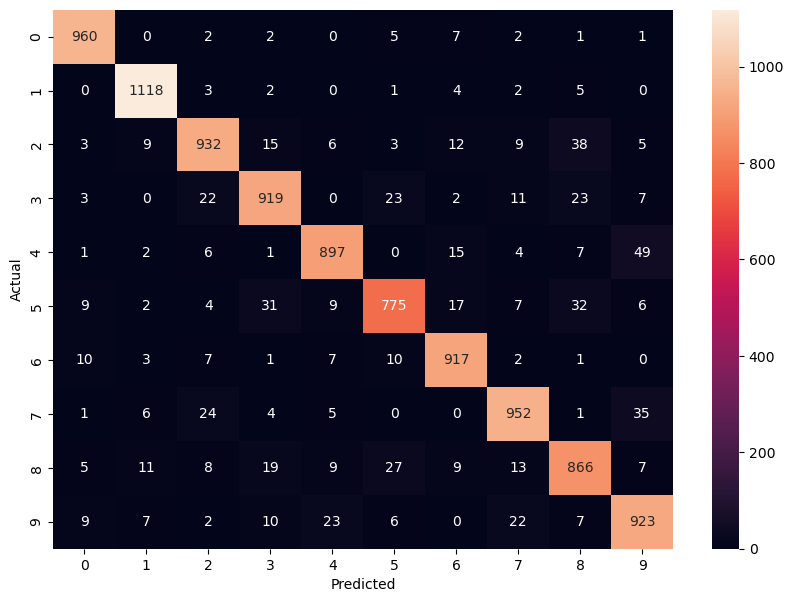

In [39]:
import seaborn as sb

plt.figure(figsize = (10,7))
sb.heatmap(conf_matrix_Vaule, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Trying Adding/Using the hidden layer

##### adding hidden layers will improve the performance!

In [40]:
model = keras.Sequential([

    # Adding 1 hidden layer :---->keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #yha pe mei initially 100 neurons paas kr ra less than compared to 28 * 28 , i can use any , activation is bar reLU use kr ra 
    
    keras.layers.Dense(10, activation='sigmoid')                    #yha pe input shape dene ki jrurat ni h kyuki ye automatically 1st layer se pta lag jaega! ki aakhir kya input shape h
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=5)

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8751 - loss: 0.4545
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9619 - loss: 0.1302
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9734 - loss: 0.0898
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0516


#### ACCURACY AFTER ADDING HIDDEN LAYER !

##### 0.972 (97%) before i was having 0.9236000180244446 (92%)

In [41]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0856


[0.07481750100851059, 0.9768000245094299]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

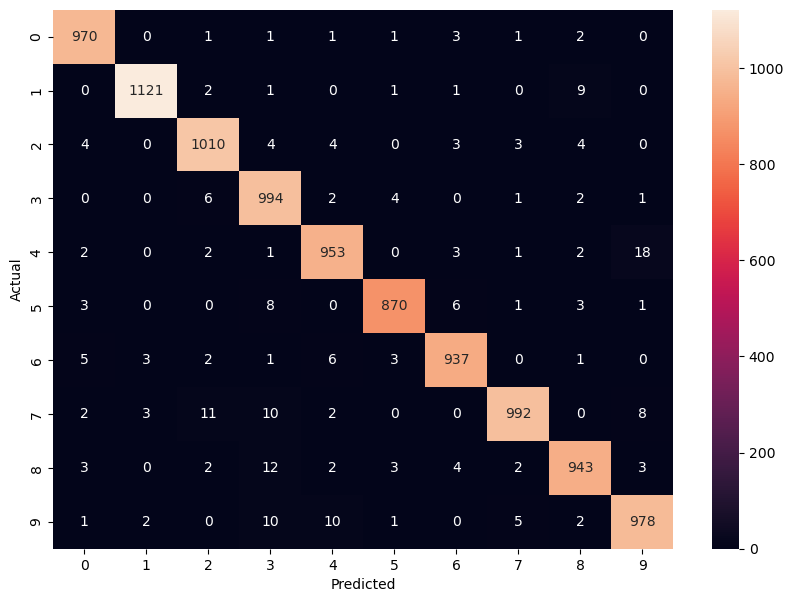

In [42]:

y_predicted_after_hidden = model.predict(X_test_flatten)

y_predicted_labels = [np.argmax(i) for i in y_predicted_after_hidden]

conf_matrix_Vaule =  tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels) #predictions = accepting real lables/values 



plt.figure(figsize = (10,7))
sb.heatmap(conf_matrix_Vaule, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### HERE I'M DOING FLATTEN ARRAY !!!

##### but keras comes with inbuilt layer = FLATTEN

### BUT ACCURACY WILL REMAIN SAME (ye sirf kaam easy kar rha h)

In [43]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28,28)),
    
    keras.layers.Dense(100, activation='relu'),   #ye meri hidden layer h
    
    keras.layers.Dense(10, activation='sigmoid')                    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8748 - loss: 0.4460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9619 - loss: 0.1339
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9732 - loss: 0.0916
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9795 - loss: 0.0684
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0526


##### 1) we can try different optimizers 
##### 2) we can try different loss value

##### https://keras.io/api/losses/


##### https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [44]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0953


[0.08233334124088287, 0.9745000004768372]